In [9]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
data = np.load('./output/random/s_val_metrics.npy', allow_pickle='TRUE').item()
data['model'] = ['S0']*len(data['loss'])
temp_data = np.load('./output/random/srr5_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (5 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/random/srr10_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (10 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/random/srr20_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (20 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/random/pretrained_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['emergent']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
    
temp_data = np.load('./output/random/s_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S0']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/random/srr5_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (5 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/random/srr10_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (10 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/random/srr20_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (20 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/random/pretrained_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['emergent']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]

data['listener'] = ['held-out']*int(len(data['loss'])/2)+['train']*int(len(data['loss'])/2)
random_val_data = pd.DataFrame(data)

In [44]:
data = np.load('./output/both-needed/s_val_metrics.npy', allow_pickle='TRUE').item()
data['model'] = ['S0']*len(data['loss'])
temp_data = np.load('./output/both-needed/srr5_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (5 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/both-needed/srr10_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (10 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/both-needed/srr20_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (20 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/both-needed/pretrained_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['emergent']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
    
temp_data = np.load('./output/both-needed/s_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S0']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/both-needed/srr5_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (5 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/both-needed/srr10_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (10 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/both-needed/srr20_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (20 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/both-needed/pretrained_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['emergent']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]

data['listener'] = ['held-out']*int(len(data['loss'])/2)+['train']*int(len(data['loss'])/2)
both_needed_val_data = pd.DataFrame(data)

In [45]:
data = np.load('./output/shape-needed/s_val_metrics.npy', allow_pickle='TRUE').item()
data['model'] = ['S0']*len(data['loss'])
temp_data = np.load('./output/shape-needed/srr5_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (5 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/shape-needed/srr10_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (10 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/shape-needed/srr20_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (20 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/shape-needed/pretrained_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['emergent']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
    
temp_data = np.load('./output/shape-needed/s_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S0']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/shape-needed/srr5_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (5 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/shape-needed/srr10_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (10 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/shape-needed/srr20_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (20 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/shape-needed/pretrained_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['emergent']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]

data['listener'] = ['held-out']*int(len(data['loss'])/2)+['train']*int(len(data['loss'])/2)
shape_needed_val_data = pd.DataFrame(data)

In [46]:
data = np.load('./output/color-needed/s_val_metrics.npy', allow_pickle='TRUE').item()
data['model'] = ['S0']*len(data['loss'])
temp_data = np.load('./output/color-needed/srr5_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (5 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/color-needed/srr10_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (10 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/color-needed/srr20_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (20 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/color-needed/pretrained_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['emergent']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
    
temp_data = np.load('./output/color-needed/s_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S0']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/color-needed/srr5_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (5 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/color-needed/srr10_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (10 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/color-needed/srr20_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (20 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/color-needed/pretrained_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['emergent']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]

data['listener'] = ['held-out']*int(len(data['loss'])/2)+['train']*int(len(data['loss'])/2)
color_needed_val_data = pd.DataFrame(data)

In [47]:
data = np.load('./output/either-ok/s_val_metrics.npy', allow_pickle='TRUE').item()
data['model'] = ['S0']*len(data['loss'])
temp_data = np.load('./output/either-ok/srr5_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (5 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/either-ok/srr10_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (10 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/either-ok/srr20_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (20 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/either-ok/pretrained_val_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['emergent']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
    
temp_data = np.load('./output/either-ok/s_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S0']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/either-ok/srr5_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (5 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/either-ok/srr10_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (10 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/either-ok/srr20_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['S1 (20 samples)']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]
temp_data = np.load('./output/either-ok/pretrained_train_metrics.npy', allow_pickle='TRUE').item()
temp_data['model'] = ['emergent']*len(temp_data['loss'])
for key in data.keys():
    data[key] = data[key]+temp_data[key]

data['listener'] = ['held-out']*int(len(data['loss'])/2)+['train']*int(len(data['loss'])/2)
either_ok_val_data = pd.DataFrame(data)

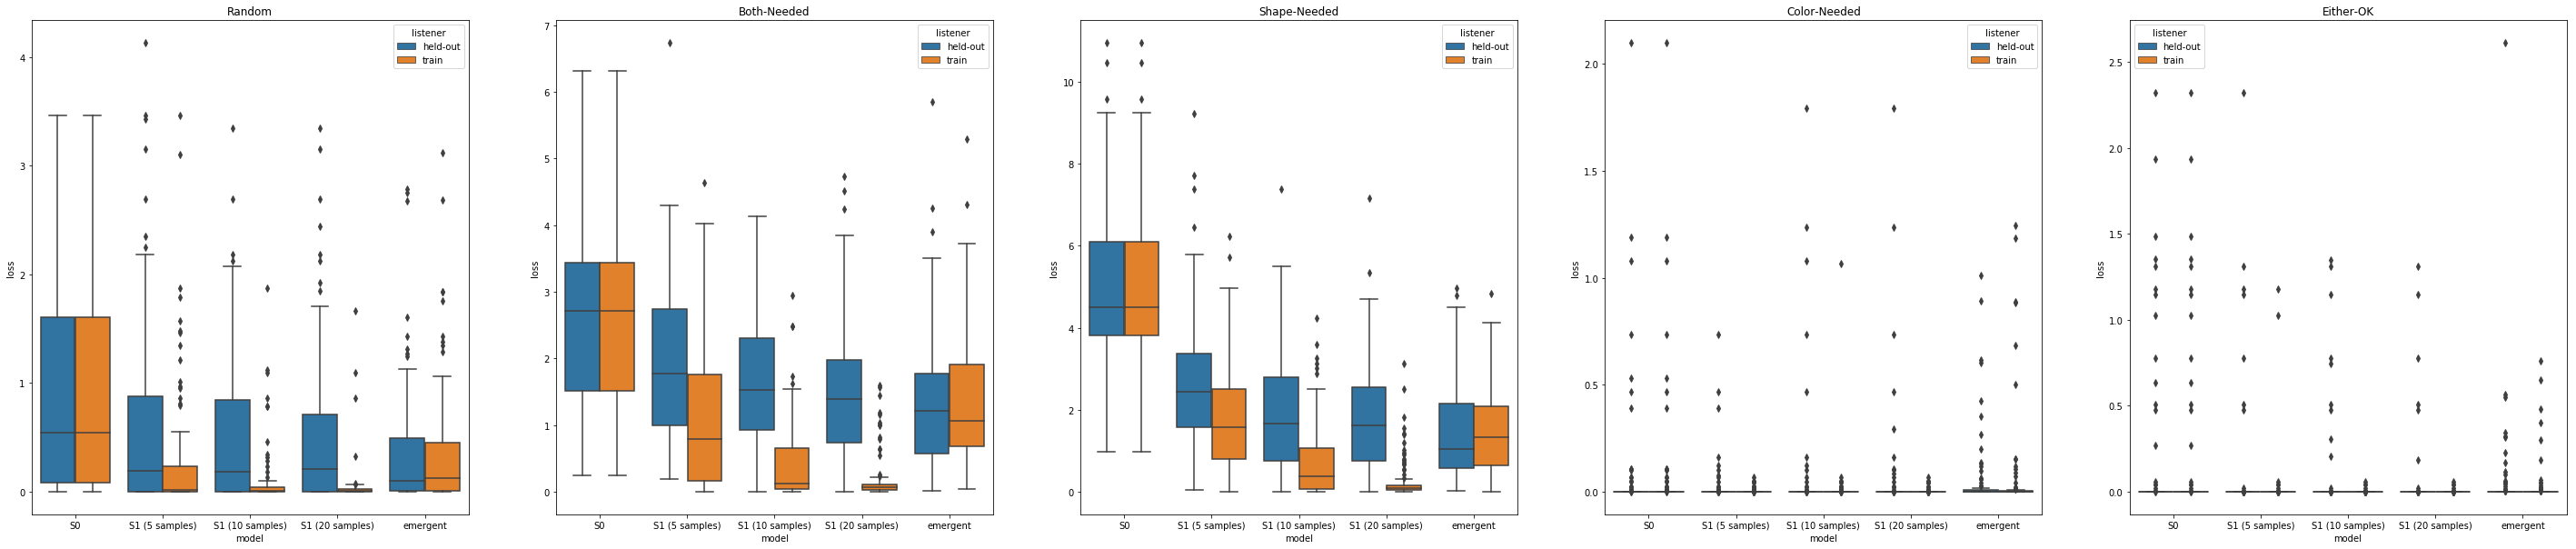

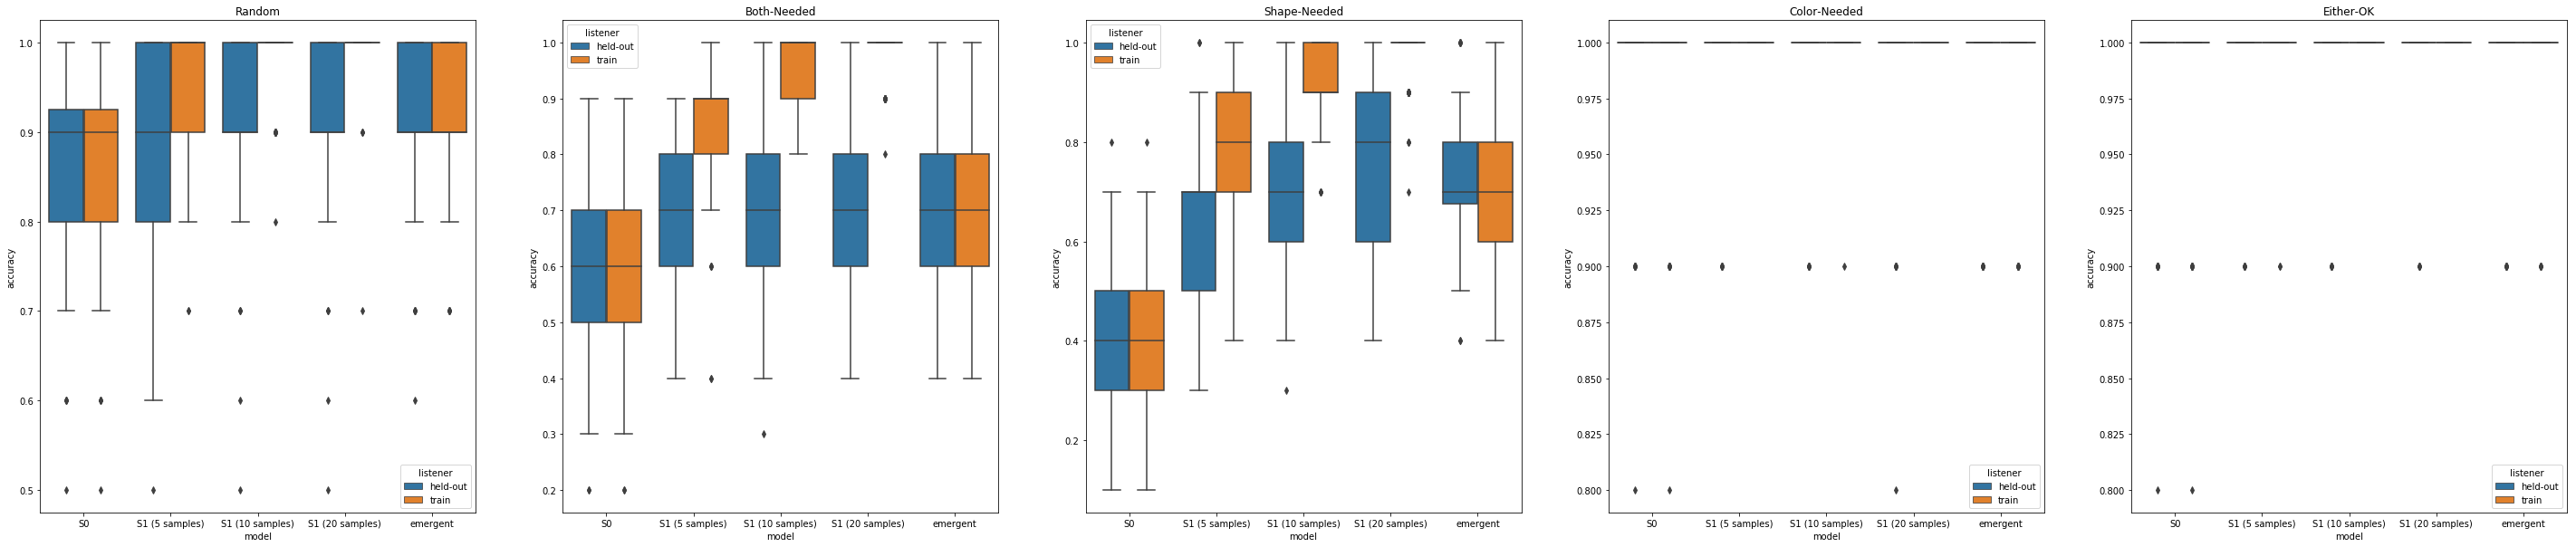

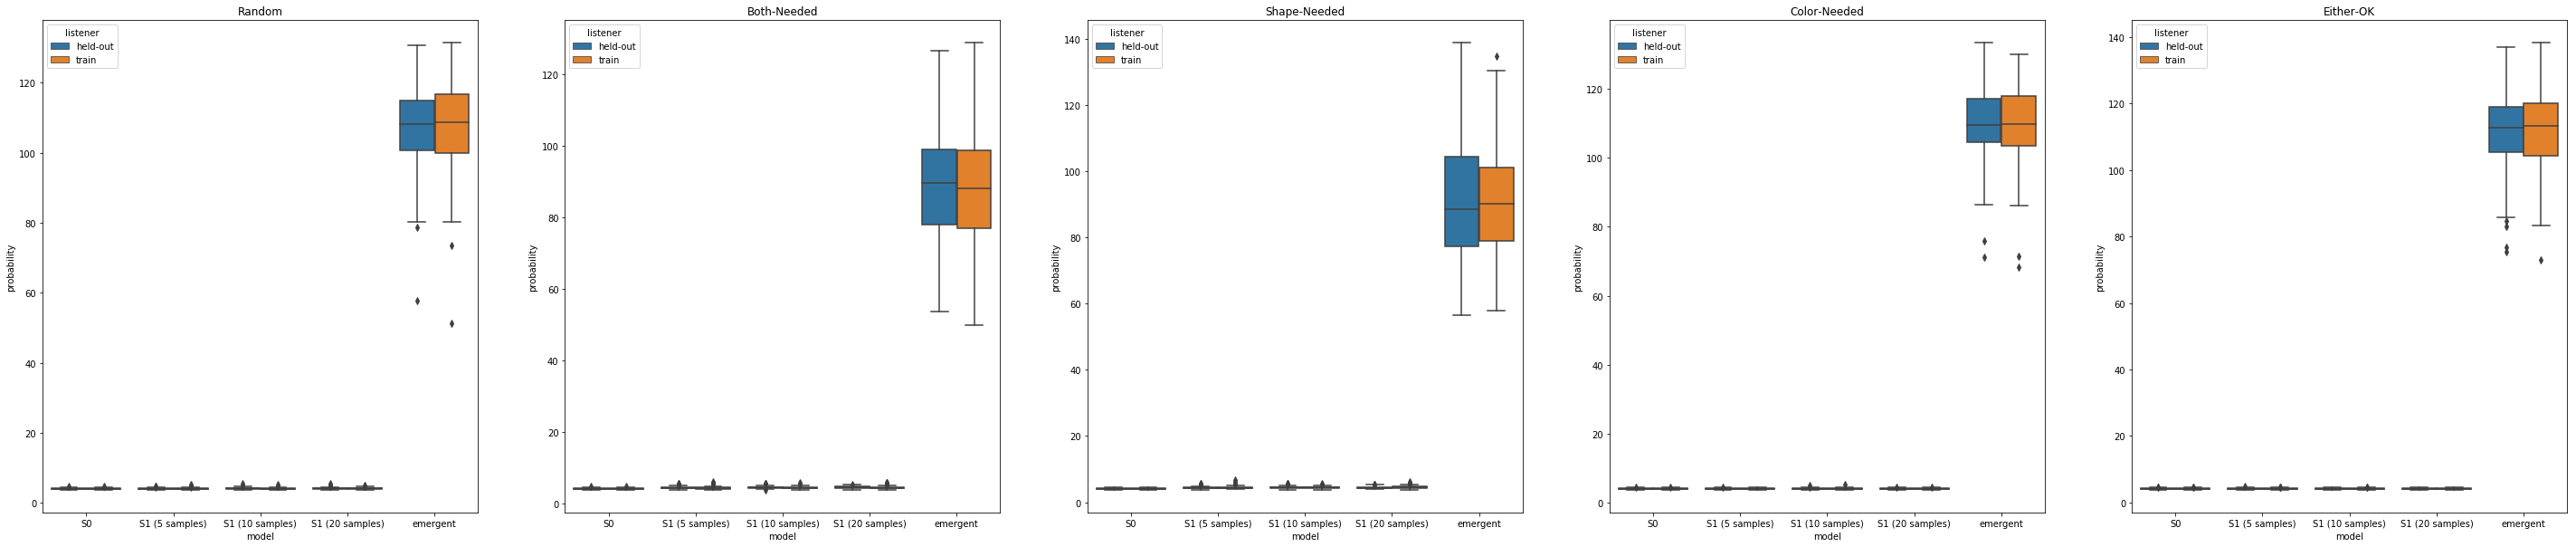

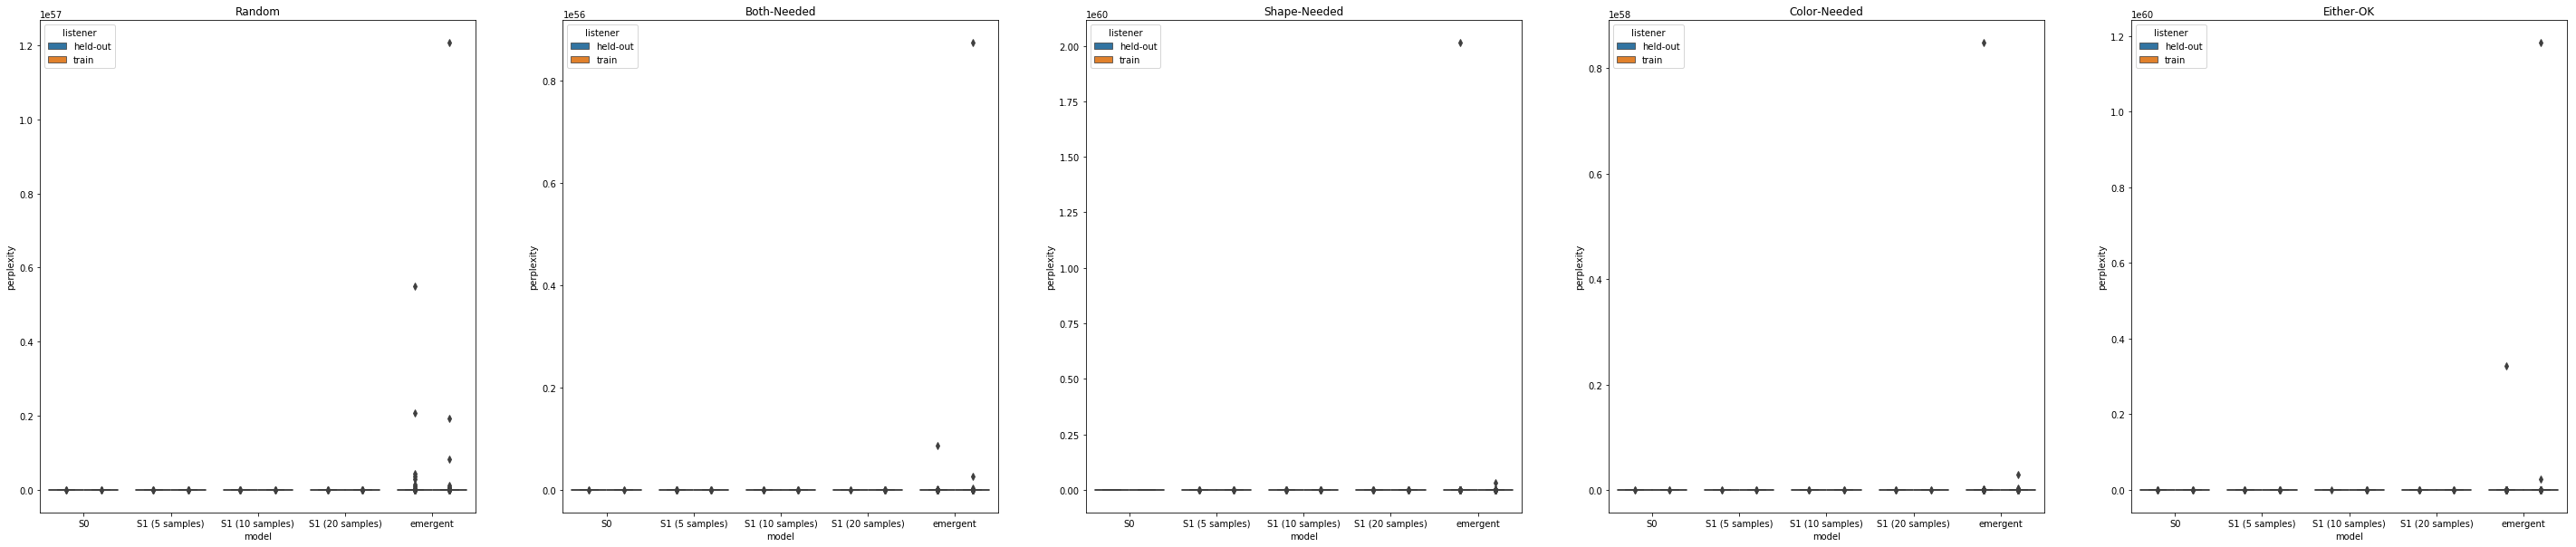

In [59]:
plt.figure(figsize=[50,10])
plt.subplot(151)
sns.boxplot(x="model", y="loss", hue="listener", data=random_val_data).set(ylabel='loss',title='Random')
plt.subplot(152)
sns.boxplot(x="model", y="loss", hue="listener", data=both_needed_val_data).set(ylabel='loss',title='Both-Needed')
plt.subplot(153)
sns.boxplot(x="model", y="loss", hue="listener", data=shape_needed_val_data).set(ylabel='loss',title='Shape-Needed')
plt.subplot(154)
sns.boxplot(x="model", y="loss", hue="listener", data=color_needed_val_data).set(ylabel='loss',title='Color-Needed')
plt.subplot(155)
sns.boxplot(x="model", y="loss", hue="listener", data=either_ok_val_data).set(ylabel='loss',title='Either-OK')
plt.savefig('./output/loss-plots.png')

plt.figure(figsize=[50,10])
plt.subplot(151)
sns.boxplot(x="model", y="acc", hue="listener", data=random_val_data).set(ylabel='accuracy',title='Random')
plt.subplot(152)
sns.boxplot(x="model", y="acc", hue="listener", data=both_needed_val_data).set(ylabel='accuracy',title='Both-Needed')
plt.subplot(153)
sns.boxplot(x="model", y="acc", hue="listener", data=shape_needed_val_data).set(ylabel='accuracy',title='Shape-Needed')
plt.subplot(154)
sns.boxplot(x="model", y="acc", hue="listener", data=color_needed_val_data).set(ylabel='accuracy',title='Color-Needed')
plt.subplot(155)
sns.boxplot(x="model", y="acc", hue="listener", data=either_ok_val_data).set(ylabel='accuracy',title='Either-OK')
plt.savefig('./output/accuracy-plots.png')

plt.figure(figsize=[50,10])
plt.subplot(151)
sns.boxplot(x="model", y="lm prob", hue="listener", data=random_val_data).set(ylabel='probability',title='Random')
plt.subplot(152)
sns.boxplot(x="model", y="lm prob", hue="listener", data=both_needed_val_data).set(ylabel='probability',title='Both-Needed')
plt.subplot(153)
sns.boxplot(x="model", y="lm prob", hue="listener", data=shape_needed_val_data).set(ylabel='probability',title='Shape-Needed')
plt.subplot(154)
sns.boxplot(x="model", y="lm prob", hue="listener", data=color_needed_val_data).set(ylabel='probability',title='Color-Needed')
plt.subplot(155)
sns.boxplot(x="model", y="lm prob", hue="listener", data=either_ok_val_data).set(ylabel='probability',title='Either-OK')
plt.savefig('./output/probability-plots.png')

plt.figure(figsize=[50,10])
plt.subplot(151)
sns.boxplot(x="model", y="lm perp", hue="listener", data=random_val_data).set(ylabel='perplexity',title='Random')
plt.subplot(152)
sns.boxplot(x="model", y="lm perp", hue="listener", data=both_needed_val_data).set(ylabel='perplexity',title='Both-Needed')
plt.subplot(153)
sns.boxplot(x="model", y="lm perp", hue="listener", data=shape_needed_val_data).set(ylabel='perplexity',title='Shape-Needed')
plt.subplot(154)
sns.boxplot(x="model", y="lm perp", hue="listener", data=color_needed_val_data).set(ylabel='perplexity',title='Color-Needed')
plt.subplot(155)
sns.boxplot(x="model", y="lm perp", hue="listener", data=either_ok_val_data).set(ylabel='perplexity',title='Either-OK')
plt.savefig('./output/perplexity-plots.png')
